In [30]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [16]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

engine.dispose()

heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)
heartdisease_df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [17]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis
y = np.where(y > 0, 0, 1)

In [27]:
#Scale and reduce dimensionality
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
pca= PCA(n_components=2).fit_transform(X_scaled)


In [34]:
k_means5=KMeans(n_clusters=5)
k_means5.fit(X_scaled)
y_preds5=k_means5.predict(X_scaled)

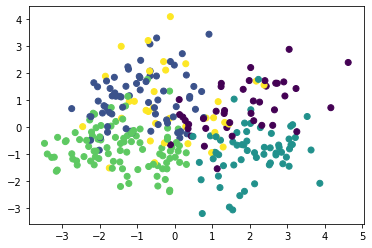

In [33]:
plt.scatter(pca[:, 0], pca[:, 1],  c=y_preds5)

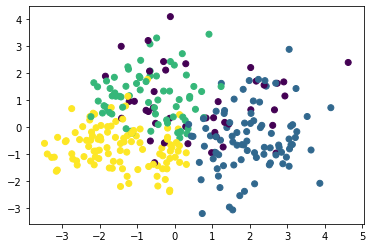

In [35]:
k_means4=KMeans(n_clusters=4)
k_means4.fit(X_scaled)
y_preds4=k_means4.predict(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1],  c=y_preds4)

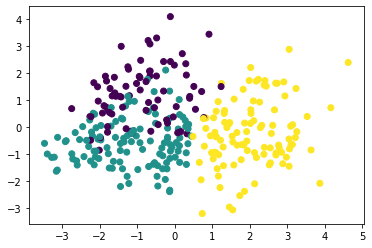

In [36]:
k_means3=KMeans(n_clusters=3)
k_means3.fit(X_scaled)
y_preds3=k_means3.predict(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1],  c=y_preds3)

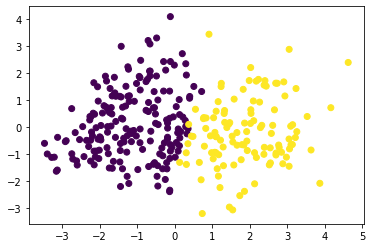

In [37]:
k_means2=KMeans(n_clusters=2)
k_means2.fit(X_scaled)
y_preds2=k_means2.predict(X_scaled)
plt.scatter(pca[:, 0], pca[:, 1],  c=y_preds2)

As _k_ decreases, the overlap of clusters significantly decreases, and seems to reach an optimal division with very little noise at k=2. 